# What are the different steps of data preprocessing

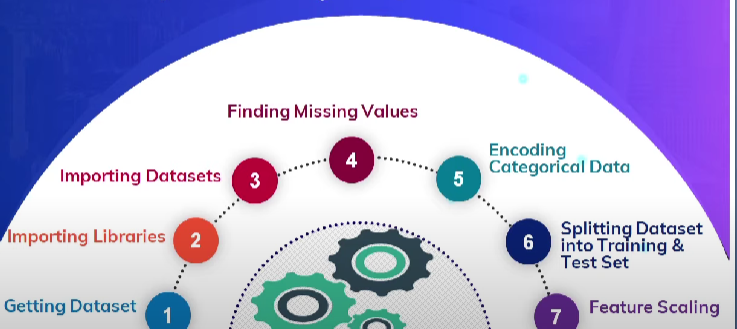

## Importing Libraries

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Loading the dataset

In [2]:
df=pd.read_csv('/kaggle/input/data-preprocessing-dataset/data_table.csv')

In [3]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,No
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## Categorizing independent and dependent variables from dataset

In [4]:
x=df[['Country','Age','Salary']]

In [5]:
x

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


#### Converting above table to array

In [6]:
x=df[['Country','Age','Salary']].values

In [7]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [8]:
y=df[['Purchased']].values

In [9]:
y

array([['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes']], dtype=object)

## Finding the missing values from dataset

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [12]:
impute=imputer.fit(x[:,1:3])

In [13]:
x[:,1:3]=imputer.transform(x[:,1:3])

In [14]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### Encoding categorial data

Label encoding, one-hot encoding, and dummy encoding are all techniques for converting categorical data into a format that computers can use:   

Label encoding 

Converts each value in a column into a number. It's best when there's an ordinal relationship between categories, such as when the order of categories is important.

One-hot encoding 

Splits a column into multiple columns, replacing numbers with 1s and 0s depending on the column value. It's best when there's no ordinal relationship between categories, such as when the order of categories doesn't matter.

Dummy encoding 

Creates new columns to represent each category. For example, if the categories are "Green", "Blue", and "Red", dummy encoding would create columns for "Color_Green" and "Color_Blue". A data point with the color "Red" would be encoded as (0, 0), while "Green" would be (1, 0), and "Blue" would be (0, 1).


The choice of encoding method depends on the data and what the model needs to understand. For example, some machine learning algorithms can handle categorical data without encoding, while others require it.  



In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder_x=LabelEncoder()

In [17]:
x[:,0]=label_encoder_x.fit_transform(x[:,0])

In [18]:
x

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

### Using dummy encoding


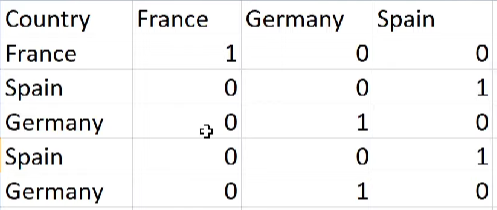

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
onehotencoder=OneHotEncoder()

In [21]:
x=onehotencoder.fit_transform(df.Country.values.reshape(-1,1)).toarray()

In [22]:
x

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [23]:
labelencoder_y=LabelEncoder()

In [24]:
y=labelencoder_y.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
y

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1])

### Splitting the dataset into Training and Test set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
x_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [29]:
x_test

array([[0., 1., 0.],
       [0., 1., 0.]])

In [30]:
type(x_test)

numpy.ndarray

In [31]:
y_train

array([0, 1, 1, 0, 1, 0, 0, 1])

In [32]:
y_test

array([0, 0])

### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc_x=StandardScaler()

In [35]:
x_train=sc_x.fit_transform(x_train)

In [36]:
x_test=sc_x.transform(x_test)

In [37]:
x_train

array([[-1.        ,  2.64575131, -0.77459667],
       [ 1.        , -0.37796447, -0.77459667],
       [-1.        , -0.37796447,  1.29099445],
       [-1.        , -0.37796447,  1.29099445],
       [ 1.        , -0.37796447, -0.77459667],
       [-1.        , -0.37796447,  1.29099445],
       [ 1.        , -0.37796447, -0.77459667],
       [ 1.        , -0.37796447, -0.77459667]])

In [38]:
x_test

array([[-1.        ,  2.64575131, -0.77459667],
       [-1.        ,  2.64575131, -0.77459667]])